In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import data and combine the train.csv with test.csv

In [80]:
train_pd = pd.read_csv('../train.csv')
test_pd = pd.read_csv('../test.csv')

train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

display(combined_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


find null values

In [81]:
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


Find out the the median fare for the same Pclass(ticket class) and embarked location. Fill the NAN 'Fare' with the median fare.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Median 8.05


/tmp/ipykernel_602903/1586607608.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Fare'].fillna(sim_fares.median(), inplace=True)


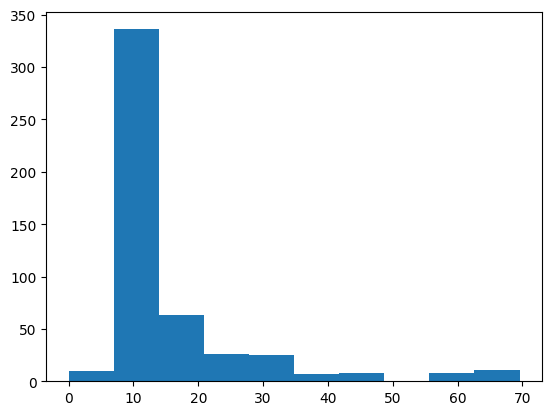

In [82]:
display(combined_pd[combined_pd['Fare'].isnull()])

sim_fares = combined_pd[ (combined_pd['Pclass'] == 3) & (combined_pd['Embarked'] == 'S') ]['Fare']
print('Median', sim_fares.median())
# display(sim_fares)
plt.hist(sim_fares)
plt.plot()

combined_pd['Fare'].fillna(sim_fares.median(), inplace=True)

Ones who bought the same class of tickets with the similar fare might embark at the same location. Fill the NAN 'Emmbarked'.

In [83]:
display(combined_pd[combined_pd['Embarked'].isnull()])

sim_emb = combined_pd[ (combined_pd['Pclass'] == 1) & (combined_pd['Fare'] >= 70) & (combined_pd['Fare'] <= 90)]['Embarked']
print(sim_emb.value_counts())

combined_pd['Embarked'].fillna('C', inplace=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Embarked
C    29
S    25
Q     3
Name: count, dtype: int64


/tmp/ipykernel_602903/2753927723.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_pd['Embarked'].fillna('C', inplace=True)


Process the attribute 'Name', define passengers' rank with their titles

In [84]:
print(combined_pd['Name'].unique())

names = combined_pd['Name']

last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(', ', 1)
        last_names.append(last)

    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

idx = np.where(np.isin(titles,['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

idx = np.where(np.isin(titles,['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles,['Ms', 'Mlle', 'Miss']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles,['Mrs', 'Mme']))
titles[idx] = 'Mrs'

print('\n')
print(np.unique(titles, return_counts= True))

combined_pd['Title'] = titles

combined_pd

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 757, 198, 264,  67,   8]))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


Create attribute 'Fare_per_Ticket', classify the ticket based on fare

In [85]:
ticket_dict = dict(combined_pd['Ticket'].value_counts())

print(ticket_dict)

combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)

combined_pd['Fare_per_Ticket'] = combined_pd['Fare']/combined_pd['tkt_count']

bins = [-1, 20, 40, 60, 80, 150]
combined_pd['Fare_Bin'] = pd.cut(combined_pd['Fare_per_Ticket'], bins)

display(combined_pd)

{'CA. 2343': 11, 'CA 2144': 8, '1601': 8, 'PC 17608': 7, 'S.O.C. 14879': 7, '347077': 7, '347082': 7, '3101295': 7, '19950': 6, '113781': 6, '347088': 6, '382652': 6, '4133': 5, 'W./C. 6608': 5, 'PC 17757': 5, '349909': 5, '220845': 5, '113503': 5, '16966': 5, 'LINE': 4, 'C.A. 33112': 4, 'PC 17755': 4, 'C.A. 34651': 4, '12749': 4, 'PC 17760': 4, '230136': 4, 'SC/Paris 2123': 4, 'W./C. 6607': 4, 'PC 17483': 4, '2666': 4, 'C.A. 2315': 4, '17421': 4, '113760': 4, '24160': 4, '36928': 4, 'S.C./PARIS 2079': 3, '315153': 3, '371110': 3, 'PC 17761': 3, 'PC 17558': 3, '230080': 3, '363291': 3, '248727': 3, '2668': 3, '2678': 3, 'A/5. 851': 3, 'A/4 48871': 3, '370129': 3, '35273': 3, 'PC 17756': 3, '28220': 3, '345773': 3, '347080': 3, '2653': 3, 'C.A. 31029': 3, '33638': 3, 'C.A. 37671': 3, 'F.C.C. 13529': 3, '11767': 3, 'PC 17758': 3, '367226': 3, '19877': 3, 'SOTON/O.Q. 3101315': 3, 'C.A. 2673': 3, '239853': 3, '13502': 3, 'PC 17582': 3, '110413': 3, '110152': 3, '2650': 3, '248738': 3, '263

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count,Fare_per_Ticket,Fare_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.641650,"(20, 40]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1,7.925000,"(-1, 20]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.550000,"(20, 40]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility,3,36.300000,"(20, 40]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"


In [86]:
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId           0
Survived            418
Pclass                0
Name                  0
Sex                   0
Age                 263
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin              1014
Embarked              0
Title                 0
tkt_count             0
Fare_per_Ticket       0
Fare_Bin              0
dtype: int64


In [87]:
combined_pd['Num_family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1
display(combined_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count,Fare_per_Ticket,Fare_Bin,Num_family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.641650,"(20, 40]",2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1,7.925000,"(-1, 20]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.550000,"(20, 40]",2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility,3,36.300000,"(20, 40]",1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]",1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1


save 'Survived' data, drop the columns of uncorrolated attributes 

In [88]:
survived_pd = combined_pd['Survived'] 
combined_pd.drop(['Name', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_Ticket','Cabin'], axis=1, inplace=True)
display(combined_pd)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family
0,1,0.0,3,male,22.0,1,0,S,Mr,"(-1, 20]",2
1,2,1.0,1,female,38.0,1,0,C,Mrs,"(20, 40]",2
2,3,1.0,3,female,26.0,0,0,S,Ms,"(-1, 20]",1
3,4,1.0,1,female,35.0,1,0,S,Mrs,"(20, 40]",2
4,5,0.0,3,male,35.0,0,0,S,Mr,"(-1, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,male,NaN,0,0,S,Mr,"(-1, 20]",1
1305,1306,NaN,1,female,39.0,0,0,C,Nobility,"(20, 40]",1
1306,1307,NaN,3,male,38.5,0,0,S,Mr,"(-1, 20]",1
1307,1308,NaN,3,male,NaN,0,0,S,Mr,"(-1, 20]",1


In [89]:
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId      0
Survived       418
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Embarked         0
Title            0
Fare_Bin         0
Num_family       0
dtype: int64


In [90]:
from sklearn.preprocessing import LabelEncoder

Age = combined_pd['Age']
combined_pd = combined_pd.drop(columns=['Age'])

label_enc = combined_pd.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)
# label_enc.set_index('PassengerId', inplace = True)
# label_enc = label_enc.rename_axis('PassengerId')
label_enc = label_enc.drop(columns=['PassengerId']).astype('float')

display(label_enc)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family
0,0.0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0
4,0.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1304,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
1305,2.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1306,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0
1307,2.0,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0


plt correlation matrix, show relationships between the attributes in dataframe

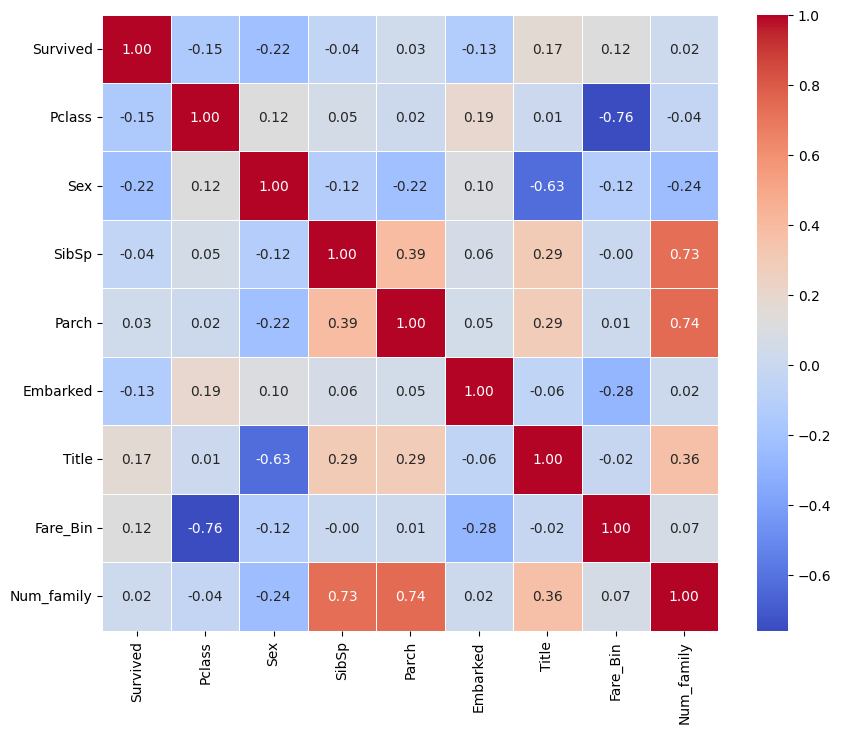

In [91]:

corr_matrix = label_enc.corr(method='pearson')

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.show()

In [92]:
label_enc.drop(['Survived'],axis=1, inplace=True)
label_enc['Age']=Age
label_enc

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family,Age
0,2.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,22.0
1,0.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,38.0
2,2.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,26.0
3,0.0,0.0,1.0,0.0,2.0,3.0,1.0,2.0,35.0
4,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,35.0
...,...,...,...,...,...,...,...,...,...
1304,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,NaN
1305,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,39.0
1306,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,38.5
1307,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,NaN


In [93]:
print('NULL VALUES')
print(label_enc.isnull().sum())

NULL VALUES
Pclass          0
Sex             0
SibSp           0
Parch           0
Embarked        0
Title           0
Fare_Bin        0
Num_family      0
Age           263
dtype: int64


In [94]:
missing_age_df = label_enc.loc[label_enc.isnull()['Age']]
remain_df = label_enc.loc[label_enc.notnull()['Age']]
(remain_df.shape,missing_age_df.shape)
missing_age_df

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family,Age
5,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,NaN
17,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,NaN
19,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,NaN
26,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN
28,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
1299,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,NaN
1301,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,NaN
1304,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,NaN
1307,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,NaN


In [95]:
from sklearn.model_selection import train_test_split

X = remain_df.drop('Age', axis=1)  
y = remain_df['Age']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

import xgboost as xgb
import numpy as np

model = xgb.XGBRegressor()

# define param list
param_dist = {
    'n_estimators': [30,50,100,150,200, 300, 400, 500],
    'learning_rate': np.linspace(0.01, 0.2, 20),
    'max_depth': [3, 4, 5, 6, 7, 8],
    'subsample': np.linspace(0.7, 1.0, 4),
    'colsample_bytree': np.linspace(0.7, 1.0, 4),
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,  
    scoring='neg_mean_absolute_error',  
    cv=3,  
    verbose=2,
    n_jobs=-1,  
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

# get best model
best_model = random_search.best_estimator_

# predict
y_pred = random_search.predict(X_test)

# calc MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.18000000000000002, max_depth=8, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.18000000000000002, max_depth=8, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.18000000000000002, max_depth=8, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.09, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.09, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7999999999999999, learning_rate=0.09, max_depth=3, n_estimators=150, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.09999999999999999, max_depth=8, n_estimators=100, subsample=0.

In [97]:
# save best model
best_model.save_model('best_model.xgb')

# load model
loaded_model = xgb.XGBRegressor()
loaded_model.load_model('best_model.xgb')

/usr/local/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [03:27:30] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [98]:
y_pred_loss_val = y_pred = random_search.predict(missing_age_df.drop(columns=['Age']))
missing_age_df['Age'] = y_pred_loss_val

/tmp/ipykernel_602903/1178880758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_age_df['Age'] = y_pred_loss_val


In [99]:
missing_age_df

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family,Age
5,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,31.817553
17,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,32.336735
19,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,30.725908
26,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,27.192327
28,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,23.354988
...,...,...,...,...,...,...,...,...,...
1299,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,23.354988
1301,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,23.354988
1304,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,28.700146
1307,2.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,28.700146


In [100]:
df_concatenated=pd.concat([missing_age_df,remain_df],axis=0)
# df_concatenated['Survived'] = survived_pd
# df_concatenated.to_csv('titanic_preprocessed.csv',index=True,index_label='PassengerId')

classify 'Age' with the new attribute 'Age_Bin'

In [101]:
print(df_concatenated['Age'].min(), df_concatenated['Age'].max())
bins = np.array([0, 10, 20, 30, 40, 50, 60 ,70, 80])
df_concatenated['Age_Bin'] = pd.cut(df_concatenated['Age'],bins)
df_concatenated.drop(columns="Age",inplace=True)
display(df_concatenated)

0.17 80.0


,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family,Age_Bin
5,2.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,"(30, 40]"
17,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,"(30, 40]"
19,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,"(30, 40]"
26,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,"(20, 30]"
28,2.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,"(20, 30]"
...,...,...,...,...,...,...,...,...,...
1300,2.0,0.0,1.0,1.0,2.0,4.0,0.0,3.0,"(0, 10]"
1302,0.0,0.0,1.0,0.0,1.0,3.0,1.0,2.0,"(30, 40]"
1303,2.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,"(20, 30]"
1305,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,"(30, 40]"


In [102]:
from sklearn.preprocessing import LabelEncoder

label_enc = df_concatenated.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)

display(label_enc)

,Pclass,Sex,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family,Age_Bin
5,2,1,0,0,1,2,0,0,3
17,1,1,0,0,2,2,0,0,3
19,2,0,0,0,0,3,0,0,3
26,2,1,0,0,0,2,0,0,2
28,2,0,0,0,1,4,0,0,2
...,...,...,...,...,...,...,...,...,...
1300,2,0,1,1,2,4,0,3,0
1302,0,0,1,0,1,3,1,2,3
1303,2,0,0,0,2,4,0,0,2
1305,0,0,0,0,0,5,1,0,3


transfor data to one_hot code in order to better fit Randomforest model

In [103]:
one_hot = label_enc.copy()

one_hot = pd.get_dummies(one_hot, columns=['Sex', 'Embarked', 'Title'])

# one_hot.rename(columns={one_hot.columns[0]: 'Index'}, inplace=True)
# one_hot.reset_index(inplace=True)
# one_hot = one_hot.reindex(range(1306))

# one_hot = one_hot.sort_values(by = 'PassengerId')
display(one_hot)

,Pclass,SibSp,Parch,Fare_Bin,Num_family,Age_Bin,Sex_0,Sex_1,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6
5,2,0,0,0,0,3,False,True,False,True,False,False,False,True,False,False,False,False
17,1,0,0,0,0,3,False,True,False,False,True,False,False,True,False,False,False,False
19,2,0,0,0,0,3,True,False,True,False,False,False,False,False,True,False,False,False
26,2,0,0,0,0,2,False,True,True,False,False,False,False,True,False,False,False,False
28,2,0,0,0,0,2,True,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2,1,1,0,3,0,True,False,False,False,True,False,False,False,False,True,False,False
1302,0,1,0,1,2,3,True,False,False,True,False,False,False,False,True,False,False,False
1303,2,0,0,0,0,2,True,False,False,False,True,False,False,False,False,True,False,False
1305,0,0,0,1,0,3,True,False,True,False,False,False,False,False,False,False,True,False


Save the processed data to .CSV file

In [104]:
one_hot['Survived'] = survived_pd
survived_pd.to_csv('survived.csv',index=True,index_label='PassengerId')
one_hot.to_csv('titanic_preprocessed.csv',index=True,index_label='PassengerId')

In [105]:
survived_pd

0       0.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1304    NaN
1305    NaN
1306    NaN
1307    NaN
1308    NaN
Name: Survived, Length: 1309, dtype: float64

In [106]:
# #Use CNN to predict missing Age
# import tensorflow as tf
# from tensorflow.keras import layers, models

# n_features = X.shape[1]  

# # define model
# model = models.Sequential([
#     # input layer
#     layers.Input(shape=(n_features,)),
#     # 1st layer
#     layers.Dense(256, activation='relu'),
#     # add Dropout reduce overfit
#     layers.Dropout(0.2),
#     layers.Dense(128, activation='relu'),
#     # 2nd dropout
#     layers.Dropout(0.2),
#     # 2nd layer relu
#     layers.Dense(64, activation='relu'),
#     layers.Dropout(0.2),
#     # 3rd layer relu
#     layers.Dense(32, activation='relu'),
#     # output layer
#     layers.Dense(1, activation='linear')
# ])

# model.compile(optimizer='adam',
#               loss='mean_squared_error',  
#               metrics=['mae'])  # use mae

# model.summary()

In [107]:


# # train model
# history = model.fit(
#     X_train, y_train,
#     epochs=200,  
#     batch_size=8,  # 32 sample
#     validation_split=0.1,  
#     verbose=1  
# )

# # evaluate model
# test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
# print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# import matplotlib.pyplot as plt

# plt.plot(history.history['mae'], label='MAE (training data)')
# plt.plot(history.history['val_mae'], label='MAE (validation data)')
# plt.title('MAE for Titanic Age Prediction')
# plt.ylabel('MAE value')
# plt.xlabel('No. epoch')
# plt.legend(loc="upper left")
# plt.show()
